In [1]:
import pandas as pd
import os

## Code to get data from one file

In [2]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 


In [3]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

## Code to loop over folder and concatenate data (untested)

In [4]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80% REAL/Final second time/newfiles" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

Loading file: 1-1000 RESULTS 2 new.xlsx
Loading file: 1001-2000 RESULTS 2 new.xlsx
Loading file: 2001-3000 RESULTS 2 new.xlsx
Loading file: 3001-3500 RESULTS 2 new.xlsx
Loading file: 3501-4500 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
4500,36.57623,43.44477,6.58442,34.24018,14.02638,31.23537,28.97889,174.78,15.08,-1.085
4501,18.67904,39.76590,6.43358,37.59854,11.88424,16.48825,25.74947,187.95,15.03,-1.033
4502,18.27380,34.89349,8.67097,34.69962,15.81196,19.46441,36.93303,184.57,17.20,-1.038
4503,17.94913,37.79538,7.37247,37.37619,24.63649,39.67006,31.63889,174.09,15.26,-1.060


In [5]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80% REAL/Final second time" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2

Loading file: 4501-5000 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,43.234,20.075,6.765,33.040,13.756,21.784,17.480,175.13,12.88,-1.092
1,44.125,32.896,7.134,37.219,29.655,43.020,31.617,157.11,15.31,-1.173
2,40.424,29.486,8.721,37.427,23.588,36.297,30.641,165.04,15.49,-1.122
3,30.442,24.137,7.348,32.985,22.093,37.199,37.782,171.85,16.02,-1.072
4,43.740,31.790,8.113,39.019,15.258,22.693,39.000,171.99,15.93,-1.131
...,...,...,...,...,...,...,...,...,...,...
496,25.001,21.234,6.133,31.444,21.458,31.909,27.892,177.79,15.23,-1.049
497,16.609,27.831,6.183,34.947,13.032,33.838,28.706,182.40,15.29,-1.036
498,28.948,29.888,6.718,34.951,27.799,40.112,30.893,168.71,15.07,-1.080
499,48.392,29.947,9.569,38.304,22.077,41.102,39.719,156.86,15.74,-1.201


In [6]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,177.79,15.23,-1.049
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,182.40,15.29,-1.036
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,168.71,15.07,-1.080
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,156.86,15.74,-1.201


In [7]:
XD = all_data[['diamond', 'ellipse_to_front', 'back_hole', 'ellipse_to_bottom',	'ellipse',	'corner',	'diamond_to_back']]  # multiple features
yD = all_data['Displacement1']
XD

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718
...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900


In [8]:
# creating train and test sets 
from sklearn.model_selection import train_test_split
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.97481309, 0.9711458 , 0.97700486, 0.9709886 , 0.97770337,
       0.97925659, 0.51944814, 0.97486934, 0.97223517, 0.96804698])

In [23]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [24]:
y_predPipeD = pipeD.predict(XD_test) 
y_predPipeD

array([-1.13441346, -1.03721904, -1.09085625, ..., -1.10206889,
       -1.14904833, -1.10792681])

R-squared: 0.98
Mean Squared Error: 0.00
Mean Absolute Error: 0.00
Root Mean Squared Error: 0.00


<function matplotlib.pyplot.show(close=None, block=None)>

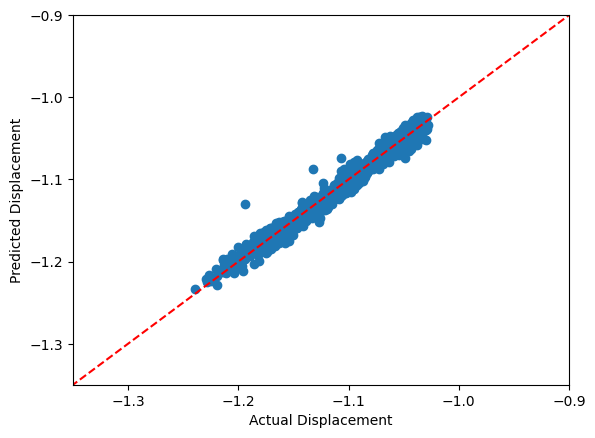

In [25]:

plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predPipeD)
print(f'Mean Squared Error: {mse:.2f}')
mae = mean_squared_error(yD_test, y_predPipeD)
print(f'Mean Absolute Error: {mae:.2f}')
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(yD_test, y_predPipeD)
print(f'Root Mean Squared Error: {mse:.2f}')

# Define the x-values for the line with slope 1
x_line = np.linspace(-2, 0)

# Calculate the corresponding y-values for the line with slope 1
y_line = x_line

# Add the line with slope 1 to the existing plot
plt.plot(x_line, y_line, 'r--', label='y=x')
plt.xlim(-1.35, -0.9)
plt.ylim(-1.35, -0.9)
plt.show

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
KNN2 = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=1,  
                      scoring='r2', 
                      return_train_score=True)
KNN2.fit(XD_train, yD_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
y_predKNN2 = KNN2.predict(XD_test) 

R-squared: 0.96


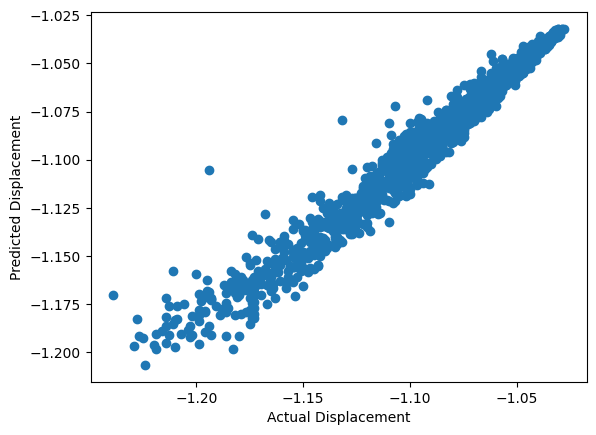

In [65]:
plt.scatter (yD_test, y_predKNN2)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predKNN2)
print(f'R-squared: {r2:.2f}')

In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [50, 100, 150, 200],
           "max_features"      : [2, 3, 4],
           "max_depth"         : [15, 20, 25],
           "min_samples_split" : [4,5,6,7] ,
           "bootstrap": [True]}
randF = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'r2')
randF.fit(XD_train, yD_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 20, 25],
                         'max_features': [2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [11]:
randF.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [12]:
y_predrandF = randF.predict(XD_test) 
y_predrandF

array([-1.13855905, -1.04840541, -1.09849369, ..., -1.10405057,
       -1.14815106, -1.09135726])

In [13]:
yD_test

4149   -1.141
3666   -1.044
1923   -1.092
218    -1.100
969    -1.116
        ...  
94     -1.227
1952   -1.053
3864   -1.097
4770   -1.149
497    -1.098
Name: Displacement1, Length: 1502, dtype: float64

R-squared: 0.98
Mean Squared Error: 0.00
Mean Absolute Error: 0.00


NameError: name 'root_mean_squared_error' is not defined

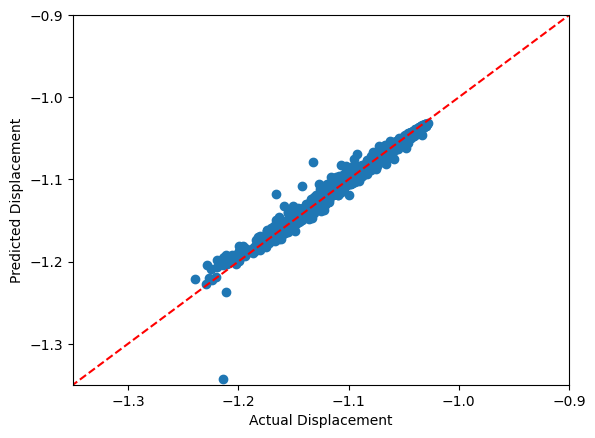

In [14]:
plt.scatter (yD_test, y_predrandF)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
# Define the x-values for the line with slope 1
x_line = np.linspace(-2, 0)

# Calculate the corresponding y-values for the line with slope 1
y_line = x_line

# Add the line with slope 1 to the existing plot
plt.plot(x_line, y_line, 'r--', label='y=x')
plt.xlim(-1.35, -0.9)
plt.ylim(-1.35, -0.9)
plt.show

r2 = r2_score(yD_test, y_predrandF)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predrandF)
print(f'Mean Squared Error: {mse:.2f}')
from sklearn.metrics import mean_absolute_error
mae = mean_squared_error(yD_test, y_predrandF)
print(f'Mean Absolute Error: {mae:.2f}')
rmse = root_mean_squared_error(yD_test, y_predrandF)
print(f'Root Mean Squared Error: {mse:.2f}')

In [108]:
from sklearn.neural_network import MLPRegressor

In [109]:
# Fitting a Regression model to the train data

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
MLP = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
    scoring ='r2')
MLP.fit(XD_train, yD_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
17 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\L

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=5)

In [110]:
MLP.best_score_

0.872680870428486

In [111]:
y_predMLP = MLP.predict(XD_test) 

R-squared: 0.93


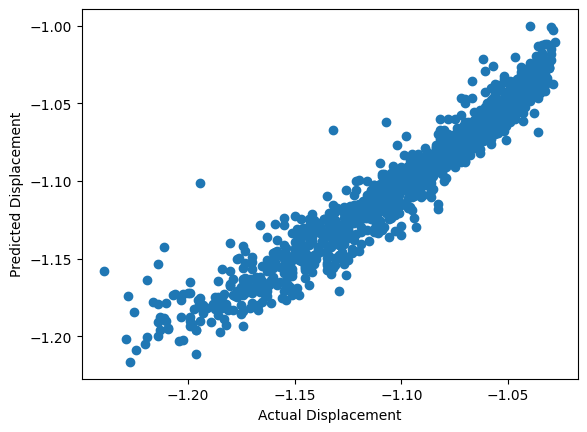

In [112]:
plt.scatter (yD_test, y_predMLP)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predMLP)
print(f'R-squared: {r2:.2f}')

In [113]:

## importing class from library
from sklearn.tree import DecisionTreeRegressor

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring = 'r2')

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(XD_train, yD_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [114]:
DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5, min_samples_leaf = 2)

In [115]:
DTR.fit(XD_train, yD_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [116]:
y_predDTR = DTR.predict(XD_test) 

R-squared: 0.92


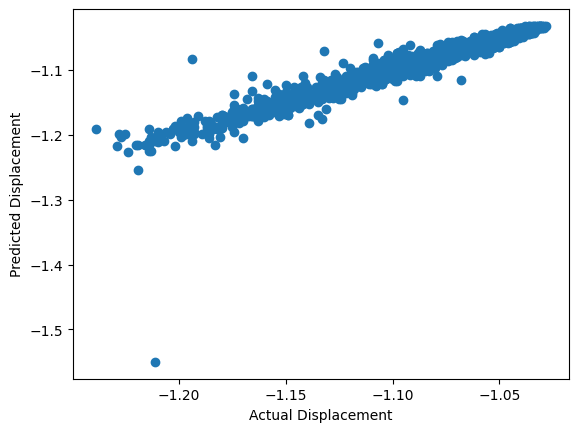

In [117]:
plt.scatter (yD_test, y_predDTR)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predDTR)
print(f'R-squared: {r2:.2f}')

In [52]:
import autogluon as ag
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
ag_data = all_data.drop(columns=['Mass2', 'Stress1'])
ag_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,-1.120
...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,-1.049
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,-1.036
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,-1.080
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,-1.201


In [55]:
ag_train, ag_test = train_test_split(ag_data, test_size=0.3, random_state=254)
ag_train

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Displacement1
3845,20.67435,24.36923,8.97159,34.47634,28.86006,26.55983,33.84231,-1.052
2183,31.98782,25.92935,8.60946,34.96626,12.53422,28.30622,36.35060,-1.066
2899,19.38823,39.73903,8.76572,37.06248,27.87612,43.26040,15.27848,-1.073
1519,28.12050,22.12720,9.13525,36.16758,28.35263,22.69135,28.78627,-1.064
894,26.25726,39.37924,9.37633,32.04919,18.00706,37.57558,20.98034,-1.056
...,...,...,...,...,...,...,...,...
391,27.15379,16.59681,7.08017,30.86235,28.17382,34.51652,27.11289,-1.068
3775,30.09196,43.41986,8.21188,33.17857,18.17946,21.15603,19.83429,-1.054
582,16.19859,25.66939,9.41720,32.98317,18.78237,29.94528,22.82275,-1.036
2154,46.81772,31.26666,8.27191,36.63091,25.11940,43.39495,20.05578,-1.165


In [59]:
predictor_ag =  TabularPredictor(label='Displacement1').fit(ag_train, time_limit=7200, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240801_161330"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          22
Memory Avail:       9.69 GB / 31.61 GB (30.6%)
Disk Space Avail:   522.69 GB / 951.65 GB (54.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdou

[1000]	valid_set's rmse: 0.00319543
[2000]	valid_set's rmse: 0.0031372
[1000]	valid_set's rmse: 0.00309606
[2000]	valid_set's rmse: 0.00302443
[3000]	valid_set's rmse: 0.00300429
[4000]	valid_set's rmse: 0.00299343
[5000]	valid_set's rmse: 0.00298749
[6000]	valid_set's rmse: 0.00298462
[7000]	valid_set's rmse: 0.00298243
[8000]	valid_set's rmse: 0.00298032
[9000]	valid_set's rmse: 0.0029792
[10000]	valid_set's rmse: 0.00297896
[1000]	valid_set's rmse: 0.00417469
[2000]	valid_set's rmse: 0.00396558
[3000]	valid_set's rmse: 0.00390042
[4000]	valid_set's rmse: 0.00386806
[5000]	valid_set's rmse: 0.00385551
[6000]	valid_set's rmse: 0.00384249
[7000]	valid_set's rmse: 0.00383676
[8000]	valid_set's rmse: 0.00383498
[9000]	valid_set's rmse: 0.00383307
[10000]	valid_set's rmse: 0.00383141
[1000]	valid_set's rmse: 0.00785214
[2000]	valid_set's rmse: 0.00774013
[3000]	valid_set's rmse: 0.00769623
[4000]	valid_set's rmse: 0.00767583
[5000]	valid_set's rmse: 0.00767102
[6000]	valid_set's rmse: 0.0

	-0.004	 = Validation score   (-root_mean_squared_error)
	150.04s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1045.75s of the 1645.87s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.00410806
[2000]	valid_set's rmse: 0.00401033
[3000]	valid_set's rmse: 0.00399763
[4000]	valid_set's rmse: 0.00400135
[1000]	valid_set's rmse: 0.00320561
[1000]	valid_set's rmse: 0.00425643
[2000]	valid_set's rmse: 0.0041995
[3000]	valid_set's rmse: 0.0041472
[4000]	valid_set's rmse: 0.00412545
[5000]	valid_set's rmse: 0.00411934
[6000]	valid_set's rmse: 0.00411799
[7000]	valid_set's rmse: 0.00411727
[8000]	valid_set's rmse: 0.00411781
[1000]	valid_set's rmse: 0.00490891
[2000]	valid_set's rmse: 0.00478934
[3000]	valid_set's rmse: 0.00475631
[4000]	valid_set's rmse: 0.00474984
[5000]	valid_set's rmse: 0.00474579
[6000]	valid_set's rmse: 0.0047435
[7000]	valid_set's rmse: 0.00474212
[8000]	valid_set's rmse: 0.00474145
[9000]	valid_set's rmse: 0.00474145
[10000]	valid_set's rmse: 0.0047414
[1000]	valid_set's rmse: 0.00797843
[2000]	valid_set's rmse: 0.00794547
[3000]	valid_set's rmse: 0.0079312
[4000]	valid_set's rmse: 0.00792747
[5000]	valid_set's rmse: 0.00792

	-0.0047	 = Validation score   (-root_mean_squared_error)
	132.45s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 910.31s of the 1510.43s of remaining time.
	-0.007	 = Validation score   (-root_mean_squared_error)
	0.85s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 909.18s of the 1509.29s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0037	 = Validation score   (-root_mean_squared_error)
	495.65s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 413.25s of the 1013.37s of remaining time.
	-0.0065	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 412.49s of the 1012.61s of remaining time.
	Fitting 8 chi

[1000]	valid_set's rmse: 0.00586456
[1000]	valid_set's rmse: 0.0084671
[1000]	valid_set's rmse: 0.00443181
[1000]	valid_set's rmse: 0.00572947
[2000]	valid_set's rmse: 0.00572769


	-0.0059	 = Validation score   (-root_mean_squared_error)
	50.35s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 142.57s of the 742.69s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3793.
	Ran out of time, early stopping on iteration 4091.
	Ran out of time, early stopping on iteration 4166.
	Ran out of time, early stopping on iteration 4102.
	Ran out of time, early stopping on iteration 4283.
	Ran out of time, early stopping on iteration 4476.
	Ran out of time, early stopping on iteration 4714.
	-0.0036	 = Validation score   (-root_mean_squared_error)
	126.75s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 15.66s of the 615.78s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran ou

[1000]	valid_set's rmse: 0.00292204
[2000]	valid_set's rmse: 0.00289027
[1000]	valid_set's rmse: 0.00232667
[2000]	valid_set's rmse: 0.00227264
[3000]	valid_set's rmse: 0.00225272
[4000]	valid_set's rmse: 0.00224156
[5000]	valid_set's rmse: 0.00223673
[6000]	valid_set's rmse: 0.00223519
[7000]	valid_set's rmse: 0.00223434
[8000]	valid_set's rmse: 0.0022338
[9000]	valid_set's rmse: 0.00223359
[10000]	valid_set's rmse: 0.00223354
[1000]	valid_set's rmse: 0.00700285
[2000]	valid_set's rmse: 0.00696692
[3000]	valid_set's rmse: 0.00696081
[1000]	valid_set's rmse: 0.00208646
[2000]	valid_set's rmse: 0.0020018
[3000]	valid_set's rmse: 0.00197749
[4000]	valid_set's rmse: 0.00196469
[5000]	valid_set's rmse: 0.00195945
[6000]	valid_set's rmse: 0.00195632
[7000]	valid_set's rmse: 0.00195412
[8000]	valid_set's rmse: 0.00195352
[9000]	valid_set's rmse: 0.00195274
[10000]	valid_set's rmse: 0.00195248
[1000]	valid_set's rmse: 0.00356769
[2000]	valid_set's rmse: 0.00350165
[3000]	valid_set's rmse: 0.0

	-0.0035	 = Validation score   (-root_mean_squared_error)
	108.7s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 488.69s of the 488.65s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.00130144
[1000]	valid_set's rmse: 0.00320063


	-0.0033	 = Validation score   (-root_mean_squared_error)
	24.66s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 463.67s of the 463.63s of remaining time.
	-0.0035	 = Validation score   (-root_mean_squared_error)
	1.27s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 462.17s of the 462.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7237.
	Ran out of time, early stopping on iteration 8121.
	Ran out of time, early stopping on iteration 9051.
	-0.0033	 = Validation score   (-root_mean_squared_error)
	236.15s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 225.81s of the 225.78s of remaining time.
	-0.0034	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime


[1000]	valid_set's rmse: 0.00694935
[1000]	valid_set's rmse: 0.00129257


	-0.0032	 = Validation score   (-root_mean_squared_error)
	39.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 52.01s of the 51.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1720.
	Ran out of time, early stopping on iteration 1648.
	Ran out of time, early stopping on iteration 1791.
	Ran out of time, early stopping on iteration 1851.
	Ran out of time, early stopping on iteration 2325.
	-0.0033	 = Validation score   (-root_mean_squared_error)
	45.36s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 6.26s of remaining time.
	Ensemble Weights: {'XGBoost_BAG_L2': 0.462, 'NeuralNetFastAI_BAG_L2': 0.231, 'LightGBMLarge_BAG_L2': 0.154, 'CatBoost_r177_BAG_L2': 0.154}
	-0.0031	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Tr

[1000]	valid_set's rmse: 0.00324551
[2000]	valid_set's rmse: 0.00314242
[3000]	valid_set's rmse: 0.00311481
[4000]	valid_set's rmse: 0.00310789
[5000]	valid_set's rmse: 0.0031082
[6000]	valid_set's rmse: 0.00310713
[7000]	valid_set's rmse: 0.00310453
[8000]	valid_set's rmse: 0.003104
[9000]	valid_set's rmse: 0.0031034
[10000]	valid_set's rmse: 0.00310317
[1000]	valid_set's rmse: 0.00334698
[2000]	valid_set's rmse: 0.00318173
[3000]	valid_set's rmse: 0.0031444
[4000]	valid_set's rmse: 0.00311706
[5000]	valid_set's rmse: 0.00310235
[6000]	valid_set's rmse: 0.00309316
[7000]	valid_set's rmse: 0.00308642
[8000]	valid_set's rmse: 0.00308412
[9000]	valid_set's rmse: 0.00308196
[10000]	valid_set's rmse: 0.00308023
[1000]	valid_set's rmse: 0.00292967
[2000]	valid_set's rmse: 0.00280603
[3000]	valid_set's rmse: 0.00275701
[4000]	valid_set's rmse: 0.00273352
[5000]	valid_set's rmse: 0.00272249
[6000]	valid_set's rmse: 0.00271549
[7000]	valid_set's rmse: 0.0027115
[8000]	valid_set's rmse: 0.00270

	-0.0039	 = Validation score   (-root_mean_squared_error)
	243.96s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 5151.15s of the 5151.15s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.00407419
[2000]	valid_set's rmse: 0.00400826
[3000]	valid_set's rmse: 0.00397238
[4000]	valid_set's rmse: 0.00394729
[5000]	valid_set's rmse: 0.00393755
[6000]	valid_set's rmse: 0.00393623
[7000]	valid_set's rmse: 0.00393679
[1000]	valid_set's rmse: 0.00428689
[2000]	valid_set's rmse: 0.00421874
[3000]	valid_set's rmse: 0.00415775
[4000]	valid_set's rmse: 0.00412828
[5000]	valid_set's rmse: 0.00411848
[6000]	valid_set's rmse: 0.00411263
[7000]	valid_set's rmse: 0.00410989
[8000]	valid_set's rmse: 0.00410957
[9000]	valid_set's rmse: 0.00410951
[10000]	valid_set's rmse: 0.0041091
[1000]	valid_set's rmse: 0.00329008
[2000]	valid_set's rmse: 0.00324465
[3000]	valid_set's rmse: 0.00324119
[1000]	valid_set's rmse: 0.00912902
[2000]	valid_set's rmse: 0.00909131
[3000]	valid_set's rmse: 0.00906574
[4000]	valid_set's rmse: 0.00905442
[5000]	valid_set's rmse: 0.00905011
[6000]	valid_set's rmse: 0.00904745
[7000]	valid_set's rmse: 0.00904648
[8000]	valid_set's rmse: 0.0

	-0.0046	 = Validation score   (-root_mean_squared_error)
	148.25s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 4999.62s of the 4999.62s of remaining time.
	-0.0068	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 4998.45s of the 4998.45s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0036	 = Validation score   (-root_mean_squared_error)
	568.97s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 4429.21s of the 4429.21s of remaining time.
	-0.0063	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 4428.43s of the 4428.43s of remaining time.
	Fitting 

[1000]	valid_set's rmse: 0.00581074
[1000]	valid_set's rmse: 0.00506647
[2000]	valid_set's rmse: 0.0050621
[3000]	valid_set's rmse: 0.00506201
[4000]	valid_set's rmse: 0.00506201
[5000]	valid_set's rmse: 0.00506201
[6000]	valid_set's rmse: 0.00506201
[7000]	valid_set's rmse: 0.00506201
[8000]	valid_set's rmse: 0.00506201
[9000]	valid_set's rmse: 0.00506201
[1000]	valid_set's rmse: 0.00965886


	-0.0058	 = Validation score   (-root_mean_squared_error)
	78.73s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 4086.38s of the 4086.38s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0036	 = Validation score   (-root_mean_squared_error)
	559.5s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 3526.61s of the 3526.61s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.004	 = Validation score   (-root_mean_squared_error)
	226.09s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 3300.42s of the 3300.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0047318
[2000]	valid_set's rmse: 0.00462063
[3000]	valid_set's rmse: 0.00459875
[1000]	valid_set's rmse: 0.00520897
[2000]	valid_set's rmse: 0.00501103
[3000]	valid_set's rmse: 0.00495823
[4000]	valid_set's rmse: 0.00493361
[5000]	valid_set's rmse: 0.00492663
[6000]	valid_set's rmse: 0.00492548
[7000]	valid_set's rmse: 0.0049262
[1000]	valid_set's rmse: 0.00374341
[2000]	valid_set's rmse: 0.00370113
[1000]	valid_set's rmse: 0.00922937
[2000]	valid_set's rmse: 0.00914652
[3000]	valid_set's rmse: 0.00912892
[4000]	valid_set's rmse: 0.00911535
[5000]	valid_set's rmse: 0.00911101
[6000]	valid_set's rmse: 0.00911088
[7000]	valid_set's rmse: 0.00911088
[1000]	valid_set's rmse: 0.00414585
[2000]	valid_set's rmse: 0.00404491
[3000]	valid_set's rmse: 0.0040223
[4000]	valid_set's rmse: 0.00401907
[5000]	valid_set's rmse: 0.00401301
[6000]	valid_set's rmse: 0.00401091
[7000]	valid_set's rmse: 0.0040109
[8000]	valid_set's rmse: 0.00400871
[9000]	valid_set's rmse: 0.00400

	-0.0049	 = Validation score   (-root_mean_squared_error)
	154.99s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 3142.06s of the 3142.06s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0038	 = Validation score   (-root_mean_squared_error)
	55.89s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 3085.88s of the 3085.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0047	 = Validation score   (-root_mean_squared_error)
	1185.08s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM_r96_BAG_L1 ... Training model for up to 1899.53s of the 1899.53s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.00391495
[2000]	valid_set's rmse: 0.00324822
[3000]	valid_set's rmse: 0.00303759
[4000]	valid_set's rmse: 0.00293329
[5000]	valid_set's rmse: 0.00286187
[6000]	valid_set's rmse: 0.00282463
[7000]	valid_set's rmse: 0.00281107
[8000]	valid_set's rmse: 0.00278879
[9000]	valid_set's rmse: 0.00278053
[10000]	valid_set's rmse: 0.00277121
[1000]	valid_set's rmse: 0.00504789
[2000]	valid_set's rmse: 0.00411617
[3000]	valid_set's rmse: 0.00379048
[4000]	valid_set's rmse: 0.00359144
[5000]	valid_set's rmse: 0.00349776
[6000]	valid_set's rmse: 0.00341717
[7000]	valid_set's rmse: 0.00336263
[8000]	valid_set's rmse: 0.00332485
[9000]	valid_set's rmse: 0.0032874
[10000]	valid_set's rmse: 0.00325294
[1000]	valid_set's rmse: 0.00388843
[2000]	valid_set's rmse: 0.00312635
[3000]	valid_set's rmse: 0.00289953
[4000]	valid_set's rmse: 0.00279998
[5000]	valid_set's rmse: 0.00275835
[6000]	valid_set's rmse: 0.00272842
[7000]	valid_set's rmse: 0.00270959
[8000]	valid_set's rmse: 0.

	-0.0039	 = Validation score   (-root_mean_squared_error)
	212.66s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1681.54s of the 1681.54s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0033	 = Validation score   (-root_mean_squared_error)
	404.19s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 1277.24s of the 1277.24s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.01	 = Validation score   (-root_mean_squared_error)
	33.24s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 1243.47s of the 1243.47s of remaining time.
	-0.0064	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost_r13

[1000]	valid_set's rmse: 0.00393281


	Ran out of time, early stopping on iteration 1412. Best iteration is:
	[1412]	valid_set's rmse: 0.00388514


[1000]	valid_set's rmse: 0.00385338


	Ran out of time, early stopping on iteration 1411. Best iteration is:
	[1411]	valid_set's rmse: 0.00380977


[1000]	valid_set's rmse: 0.00335142


	Ran out of time, early stopping on iteration 1407. Best iteration is:
	[1392]	valid_set's rmse: 0.00331441


[1000]	valid_set's rmse: 0.00883994


	Ran out of time, early stopping on iteration 1452. Best iteration is:
	[1448]	valid_set's rmse: 0.00879834


[1000]	valid_set's rmse: 0.00340599


	Ran out of time, early stopping on iteration 1412. Best iteration is:
	[1411]	valid_set's rmse: 0.00336641


[1000]	valid_set's rmse: 0.00242559


	Ran out of time, early stopping on iteration 1532. Best iteration is:
	[1530]	valid_set's rmse: 0.002373


[1000]	valid_set's rmse: 0.00311137


	Ran out of time, early stopping on iteration 1672. Best iteration is:
	[1672]	valid_set's rmse: 0.00307366


[1000]	valid_set's rmse: 0.00332431


	Ran out of time, early stopping on iteration 1992. Best iteration is:
	[1978]	valid_set's rmse: 0.00329089
	-0.0044	 = Validation score   (-root_mean_squared_error)
	63.38s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 540.11s of the 1.73s of remaining time.
	Ensemble Weights: {'CatBoost_r137_BAG_L1': 0.5, 'NeuralNetTorch_r22_BAG_L1': 0.4, 'NeuralNetTorch_r79_BAG_L1': 0.1}
	-0.0029	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 5399.51s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3004.2 rows/s (438 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240801_161330")


In [60]:
ag_pred = predictor_ag.predict(ag_test.drop(columns=['Displacement1']))

In [61]:
predictor_ag.evaluate(ag_test, silent=True)

{'root_mean_squared_error': -0.02502356934932298,
 'mean_squared_error': -0.0006261790229803764,
 'mean_absolute_error': -0.001421972432244476,
 'r2': 0.7832030648147043,
 'pearsonr': 0.8863769395068694,
 'median_absolute_error': -0.0005147356986998641}